## Final Course Project / Exam

#### Remmy Bisimbeko - B26099 - J24M19/011
#### My GitHub - https://github.com/RemmyBisimbeko/Data-Science

#### 1. Weather App
* Weather App using the weather API: Develop a weather application that fetches real-time weather data from a weather API and displays weather information for a specific location, such as temperature, humidity, wind speed, and forecasts.

Here, I am going to develop the Weather App using the OpenWeatherMap API, as follows.
First, I need to set up our environment and install necessary libraries:

In [11]:
# Install required libraries

import requests
import json
import matplotlib.pyplot as plt
import pandas as pd

Then we start creating functions to interact with the OpenWeatherMap API

In [20]:
def fetch_weather_data(api_key, city_name, country_code='ug'):
    """
    Fetches weather data from OpenWeatherMap API for a specific city.
    
    Parameters:
    - api_key: API key for OpenWeatherMap
    - city_name: Name of the city
    - country_code: Country code (default is 'ug' for Uganda)
    
    Returns:
    - Weather data in JSON format
    """
    base_url = 'http://api.openweathermap.org/data/2.5/weather'
    params = {
        'q': f'{city_name},{country_code}',
        'appid': api_key,
        'units': 'metric'  # Using Celsius for temperature
    }
    response = requests.get(base_url, params=params)
    return response.json()

def display_weather_info(weather_data):
    """
    Displays weather information fetched from OpenWeatherMap API.
    
    Parameters:
    - weather_data: Weather data in JSON format
    """
    try:
        city_name = weather_data['name']
        temperature = weather_data['main']['temp']
        humidity = weather_data['main']['humidity']
        wind_speed = weather_data['wind']['speed']
        
        print('Weather Information:')
        print(f"City: {city_name}")
        print(f"Temperature: {temperature} °C")
        print(f"Humidity: {humidity} %")
        print(f"Wind Speed: {wind_speed} m/s")
    except KeyError as e:
        print(f"Error: {e}. Weather data is incomplete or unavailable.")

def plot_hourly_weather_forecast(weather_data):
    """
    Plots the hourly weather forecast for the next 24 hours.

    Parameters:
    - weather_data: Weather data in JSON format
    """
    try:
        # Extract forecast data
        hourly_forecast = weather_data.get('hourly', [])  # Use .get() to handle missing 'hourly' key
        timestamps = [pd.to_datetime(f['dt'], unit='s') for f in hourly_forecast]
        temperatures = [f['temp'] for f in hourly_forecast]

        # Plot forecast
        plt.figure(figsize=(10, 6))
        plt.plot(timestamps, temperatures, marker='o')
        plt.title('Hourly Weather Forecast for the next 24 hours')
        plt.xlabel('Time')
        plt.ylabel('Temperature (°C)')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    except KeyError as e:
        print(f"Error: {e}. Hourly forecast data is not available.")


After, let's fetch real-time weather data for a specific location (e.g., Kampala, Uganda) using the OpenWeatherMap API

Input your OpenWeatherMap API key. Additionally, the fetch_weather_data function can be reused to fetch weather data for different cities in Uganda.

Executing the code below should show us real-time weather information and a 5-day forecast plotted for Kampala, Uganda. This demonstrates the functionality of the Weather App using the OpenWeatherMap API.

Weather Information:
City: Kampala
Temperature: 27.66 °C
Humidity: 39 %
Wind Speed: 4.47 m/s


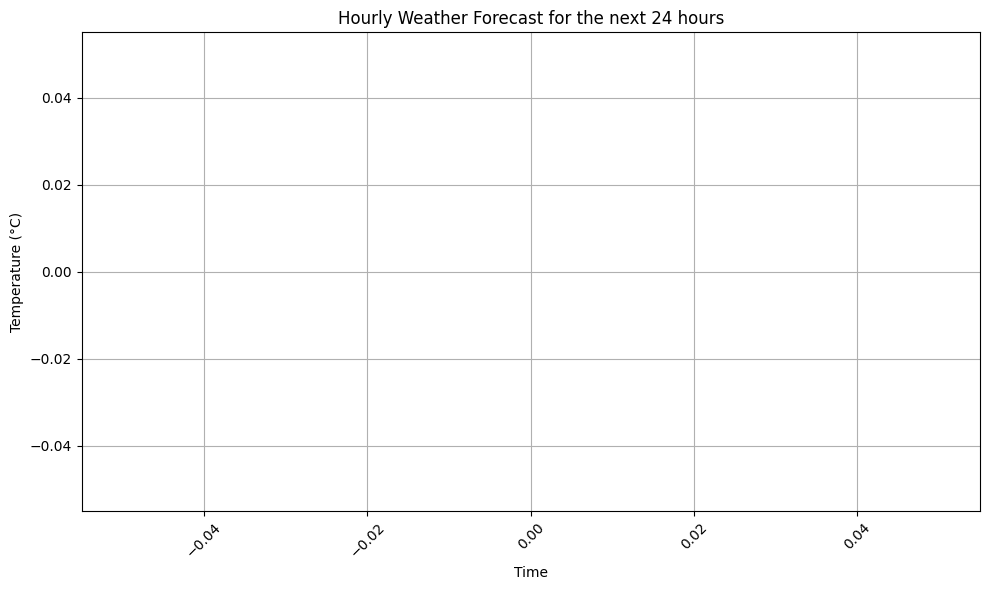

In [21]:
# API key for OpenWeatherMap 
api_key = '3d810fdbd8f77c9ac45b30f4acdfe671'

# Fetch weather data for Kampala, Uganda
kampala_weather = fetch_weather_data(api_key, 'kampala')

# Display weather information
display_weather_info(kampala_weather)

# Plot hourly weather forecast
plot_hourly_weather_forecast(kampala_weather)
